In [3]:
import pandas as pd
from sqlalchemy import engine
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

In [4]:
df = pd.read_csv("Top-50-musicality-global.csv")

In [5]:
df

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.000000,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.000000,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.000000,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.000000,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.000000,0,0.1270,-7.346,1,0.0360,100.012,4,0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,3584,VNM,Too Sad to Dance,Jung Kook,GOLDEN,84,2023-11-03,AR,0.558,0.6110,...,0.467,0.000000,10,0.1050,-6.292,1,0.0809,100.518,4,0.563
3585,3585,VNM,tình yêu có nghĩa là gì?,tlinh,ái,63,2023-08-16,AR,0.443,0.8640,...,0.371,0.780000,5,0.4210,-12.080,0,0.0377,92.468,4,0.189
3586,3586,VNM,You & Me,JENNIE,JENNIE Special Single [You & Me],83,2023-10-06,AR,0.787,0.0147,...,0.573,0.000017,9,0.0926,-6.197,1,0.0606,111.996,4,0.575
3587,3587,VNM,Shot Glass of Tears,Jung Kook,GOLDEN,84,2023-11-03,AR,0.507,0.5080,...,0.394,0.000000,6,0.0825,-7.188,0,0.0350,77.955,4,0.164


In [6]:
df.shape

(3589, 21)

In [7]:
df = df.drop(columns={'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Key', 'TSignature'})

In [8]:
df.describe()

,Unnamed: 0,Popularity,Danceability,Acousticness,duration,Energy,Speechiness,Tempo,Positiveness
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,1794.000000,78.451101,0.688079,0.285637,193871.083031,0.646463,0.105122,121.027742,0.528968
std,1036.199386,15.242710,0.135642,0.258611,47673.155605,0.163505,0.097852,27.624052,0.228932
min,0.000000,0.000000,0.244000,0.000008,61673.000000,0.024200,0.023200,60.038000,0.037300
25%,897.000000,67.000000,0.596000,0.079600,162768.000000,0.543000,0.039900,99.904000,0.359000
50%,1794.000000,83.000000,0.706000,0.188000,187027.000000,0.669000,0.063300,118.024000,0.524000
75%,2691.000000,90.000000,0.795000,0.441000,219724.000000,0.762000,0.131000,139.945000,0.720000
max,3588.000000,100.000000,0.974000,0.984000,641941.000000,0.992000,0.731000,217.969000,0.978000


In [9]:
df.dropna()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Speechiness,Tempo,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,206020,0.809,0.0955,106.017,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,131872,0.733,0.0319,111.018,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,184061,0.421,0.0285,98.224,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,183551,0.831,0.0440,124.987,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,229478,0.658,0.0360,100.012,0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,3584,VNM,Too Sad to Dance,Jung Kook,GOLDEN,84,2023-11-03,AR,0.558,0.6110,175912,0.467,0.0809,100.518,0.563
3585,3585,VNM,tình yêu có nghĩa là gì?,tlinh,ái,63,2023-08-16,AR,0.443,0.8640,133562,0.371,0.0377,92.468,0.189
3586,3586,VNM,You & Me,JENNIE,JENNIE Special Single [You & Me],83,2023-10-06,AR,0.787,0.0147,179164,0.573,0.0606,111.996,0.575
3587,3587,VNM,Shot Glass of Tears,Jung Kook,GOLDEN,84,2023-11-03,AR,0.507,0.5080,167247,0.394,0.0350,77.955,0.164


In [10]:
df = df.rename(columns={'Track Name': 'Track_Name', 'Artist Name': 'Artist_Name', 'Album Name': 'Album_Name'})
df.head()

,Unnamed: 0,Country,Track_Name,Artist_Name,Album_Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Speechiness,Tempo,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,206020,0.809,0.0955,106.017,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,131872,0.733,0.0319,111.018,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,184061,0.421,0.0285,98.224,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,183551,0.831,0.0440,124.987,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,229478,0.658,0.0360,100.012,0.176


In [11]:
q = """
SELECT *
FROM df
WHERE (Country = 'Global') OR (Country = 'USA') OR (Country = 'ESP')
"""

df_Esp_Usa_Glo = pysqldf(q)

In [12]:
df_Esp_Usa_Glo

,Unnamed: 0,Country,Track_Name,Artist_Name,Album_Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Speechiness,Tempo,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.044700,206020,0.809,0.0955,106.017,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.256000,131872,0.733,0.0319,111.018,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.827000,184061,0.421,0.0285,98.224,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.312000,183551,0.831,0.0440,124.987,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.050400,229478,0.658,0.0360,100.012,0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1145,USA,Blank Space (Taylor's Version),Taylor Swift,1989 (Taylor's Version),89,2023-10-26,AR,0.737,0.097600,231833,0.725,0.0641,96.012,0.755
146,1146,USA,You Proof,Morgan Wallen,One Thing At A Time,85,2023-03-03,AR,0.732,0.265000,157478,0.839,0.0345,119.724,0.629
147,1147,USA,Out Of The Woods (Taylor's Version),Taylor Swift,1989 (Taylor's Version),88,2023-10-26,AR,0.547,0.000512,235800,0.885,0.0418,91.992,0.192
148,1148,USA,Romantic Homicide,d4vd,Romantic Homicide,91,2022-07-20,AR,0.571,0.453000,132631,0.544,0.0299,132.052,0.216


In [13]:
df_Esp_Usa_Glo.to_csv("Top 50 Esp, Usa, Global.csv")

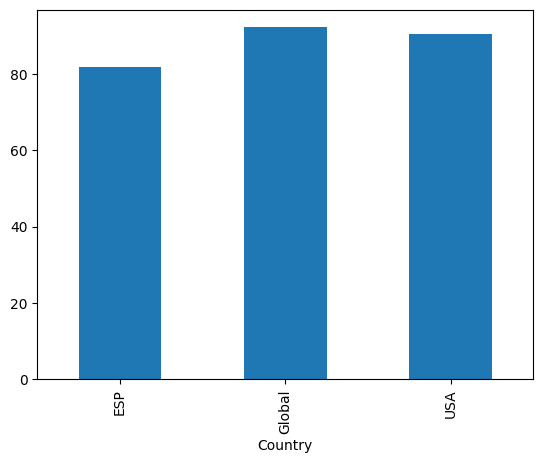

In [14]:
mediaPopularity = df_Esp_Usa_Glo.groupby('Country')['Popularity'].mean()

ax = mediaPopularity.plot.bar()

In [15]:
q = """
SELECT *
FROM df
WHERE (Country = 'DEU') OR (Country = 'ITA') OR (Country = 'ESP')
OR (Country = 'BEL') OR (Country = 'AUT') OR (Country = 'FRA')
OR (Country = 'DNK') OR (Country = 'HUN') OR (Country = 'CZE')
OR (Country = 'NLD')
"""

df_Europe = pysqldf(q)

In [16]:
df_Europe

,Unnamed: 0,Country,Track_Name,Artist_Name,Album_Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Speechiness,Tempo,Positiveness
0,50,DEU,Liebe Grüsse,RAF Camora,Liebe Grüsse,80,2023-10-27,AR,0.796,0.17900,136988,0.865,0.0801,130.012,0.768
1,51,DEU,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.82700,184061,0.421,0.0285,98.224,0.524
2,52,DEU,Vois sur ton chemin - Techno Mix,BENNETT,Vois sur ton chemin (Techno Mix),91,2023-08-04,AR,0.634,0.09080,178156,0.824,0.0470,137.959,0.371
3,53,DEU,Blonde Chaya - Sped up,Amaru,Blonde Chaya (Sped up),80,2023-09-08,AR,0.717,0.29700,181053,0.804,0.1440,170.926,0.832
4,54,DEU,2 Germans (feat. Gzuz),Luciano,2 Germans (feat. Gzuz),77,2023-10-26,AR,0.776,0.02830,149444,0.714,0.3350,161.015,0.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2245,NLD,Stiekem,Maan,Leven,66,2022-11-04,AR,0.748,0.01560,203438,0.579,0.0323,127.974,0.625
496,2246,NLD,7K Op Je Feestje,Noano,7K op je feestje,70,2023-09-14,AR,0.863,0.00749,130485,0.535,0.2370,103.051,0.391
497,2247,NLD,RUNAWAY,OneRepublic,RUNAWAY,82,2023-05-26,AR,0.624,0.03360,143265,0.684,0.0513,163.033,0.750
498,2248,NLD,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.05040,229478,0.658,0.0360,100.012,0.176


In [18]:
df_Europe.to_csv("Top 50 Europa")

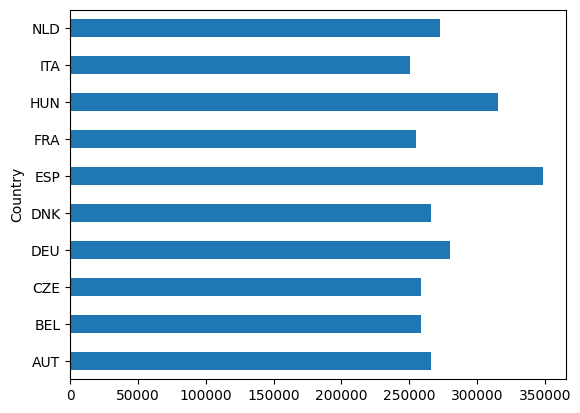

In [19]:
maxDuration = df_Europe.groupby('Country')['duration'].max()

ax = maxDuration.plot.barh()

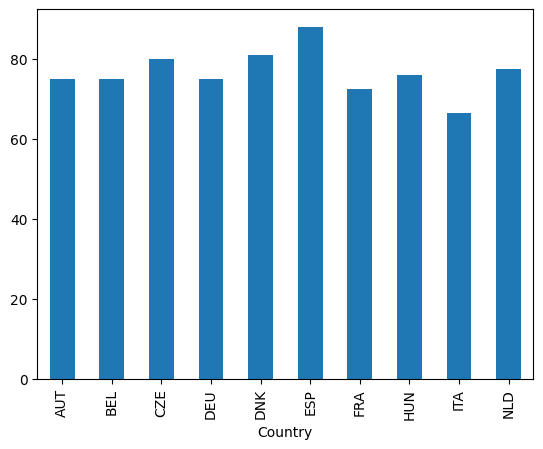

In [20]:
minTempo = df_Europe.groupby('Country')['Tempo'].min()

ax = minTempo.plot.bar()

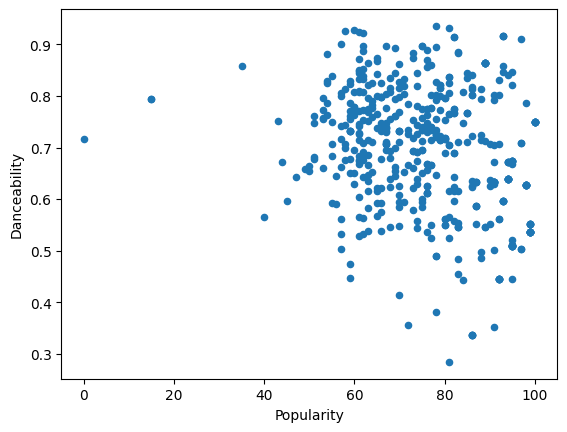

In [21]:
ax = df_Europe.plot.scatter("Popularity", "Danceability")